# Player Production Linear Regression Model


1. Collecting Data: Player Game logs from Basketball Reference. [link](https://www.basketball-reference.com/players/d/doncilu01/gamelog/2024)


2. Cleaning Data from the Player's season


In [36]:
import pandas as pd

# data_path = "./luka_23-24.csv"
data_path = "./pj_23-24.csv"
df = pd.read_csv(data_path)
df.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,51,45,2024-02-10,25-171,DAL,NaN,OKC,W (+35),0,24:29,...,4,5,1,1,0,2,3,14,9.4,24
1,52,46,2024-02-12,25-173,DAL,NaN,WAS,W (+8),1,35:41,...,5,5,3,0,0,2,2,9,3.3,8
2,53,47,2024-02-14,25-175,DAL,NaN,SAS,W (+23),1,27:52,...,5,6,2,0,1,1,2,3,0.9,19
3,54,48,2024-02-22,25-183,DAL,NaN,PHO,W (+10),1,30:35,...,4,6,1,1,1,1,3,12,9.4,11
4,55,49,2024-02-25,25-186,DAL,@,IND,L (-22),1,30:31,...,6,6,1,2,0,4,3,2,-2.5,-17


In [37]:
# Check for data types
print(df.info())

# Checking for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          29 non-null     int64  
 1   G           29 non-null     int64  
 2   Date        29 non-null     object 
 3   Age         29 non-null     object 
 4   Tm          29 non-null     object 
 5   Unnamed: 5  15 non-null     object 
 6   Opp         29 non-null     object 
 7   Unnamed: 7  29 non-null     object 
 8   GS          29 non-null     int64  
 9   MP          29 non-null     object 
 10  FG          29 non-null     int64  
 11  FGA         29 non-null     int64  
 12  FG%         29 non-null     float64
 13  3P          29 non-null     int64  
 14  3PA         29 non-null     int64  
 15  3P%         29 non-null     float64
 16  FT          29 non-null     int64  
 17  FTA         29 non-null     int64  
 18  FT%         20 non-null     float64
 19  ORB         29 non-null     int

In [38]:
# Drop first column and second column
# df = df.drop([df.columns[0], df.columns[1]], axis=1)
df.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,51,45,2024-02-10,25-171,DAL,NaN,OKC,W (+35),0,24:29,...,4,5,1,1,0,2,3,14,9.4,24
1,52,46,2024-02-12,25-173,DAL,NaN,WAS,W (+8),1,35:41,...,5,5,3,0,0,2,2,9,3.3,8
2,53,47,2024-02-14,25-175,DAL,NaN,SAS,W (+23),1,27:52,...,5,6,2,0,1,1,2,3,0.9,19
3,54,48,2024-02-22,25-183,DAL,NaN,PHO,W (+10),1,30:35,...,4,6,1,1,1,1,3,12,9.4,11
4,55,49,2024-02-25,25-186,DAL,@,IND,L (-22),1,30:31,...,6,6,1,2,0,4,3,2,-2.5,-17


In [39]:
# df.set_index(df.columns[0], inplace=True)
# df.head()

In [40]:
# rename two columns and fill na to home
df.rename(columns={"Unnamed: 5": "H/A"}, inplace=True)
df["H/A"].fillna("home", inplace=True)

df.rename(columns={"Unnamed: 7": "W/L"}, inplace=True)
df.head()

,Rk,G,Date,Age,Tm,H/A,Opp,W/L,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,51,45,2024-02-10,25-171,DAL,home,OKC,W (+35),0,24:29,...,4,5,1,1,0,2,3,14,9.4,24
1,52,46,2024-02-12,25-173,DAL,home,WAS,W (+8),1,35:41,...,5,5,3,0,0,2,2,9,3.3,8
2,53,47,2024-02-14,25-175,DAL,home,SAS,W (+23),1,27:52,...,5,6,2,0,1,1,2,3,0.9,19
3,54,48,2024-02-22,25-183,DAL,home,PHO,W (+10),1,30:35,...,4,6,1,1,1,1,3,12,9.4,11
4,55,49,2024-02-25,25-186,DAL,@,IND,L (-22),1,30:31,...,6,6,1,2,0,4,3,2,-2.5,-17


In [41]:
# df.columns

# na_rows = df[df.isna().any(axis=1)]
# print(na_rows)

In [42]:
df

,Rk,G,Date,Age,Tm,H/A,Opp,W/L,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,51,45,2024-02-10,25-171,DAL,home,OKC,W (+35),0,24:29,...,4,5,1,1,0,2,3,14,9.4,24
1,52,46,2024-02-12,25-173,DAL,home,WAS,W (+8),1,35:41,...,5,5,3,0,0,2,2,9,3.3,8
2,53,47,2024-02-14,25-175,DAL,home,SAS,W (+23),1,27:52,...,5,6,2,0,1,1,2,3,0.9,19
3,54,48,2024-02-22,25-183,DAL,home,PHO,W (+10),1,30:35,...,4,6,1,1,1,1,3,12,9.4,11
4,55,49,2024-02-25,25-186,DAL,@,IND,L (-22),1,30:31,...,6,6,1,2,0,4,3,2,-2.5,-17
5,56,50,2024-02-27,25-188,DAL,@,CLE,L (-2),1,35:26,...,2,2,2,3,1,0,2,11,11.9,17
6,57,51,2024-02-28,25-189,DAL,@,TOR,W (+11),1,31:29,...,4,6,0,0,3,2,1,23,17.7,-2
7,58,52,2024-03-01,25-191,DAL,@,BOS,L (-28),1,35:13,...,5,7,0,0,1,0,2,17,11.4,-22
8,59,53,2024-03-03,25-193,DAL,home,PHI,L (-4),1,35:29,...,2,4,2,1,0,2,2,13,8.8,5
9,60,54,2024-03-05,25-195,DAL,home,IND,L (-17),1,37:04,...,6,7,3,1,1,0,1,20,20.3,-10


In [43]:
# df.drop([17, 27, 31, 35, 38, 39, 40, 47, 66, 76, 80, 81], inplace=True)
# print(df)

In [44]:
inactive_exists = df["GS"].isin(["Inactive"]).any()
print(inactive_exists)

False


In [45]:
print(df[df["GS"] != "1"]["GS"])

0     0
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
Name: GS, dtype: int64


In [46]:
df.columns

Index(['Rk', 'G', 'Date', 'Age', 'Tm', 'H/A', 'Opp', 'W/L', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-'],
      dtype='object')

In [47]:
# Basic Stats MP, FG, FGA, FG%, 3P, 3PA, 3P%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS
basic = df[
    [
        "MP",
        "FG",
        "FGA",
        "FG%",
        "3P",
        "3PA",
        "3P%",
        "FT",
        "FTA",
        "FT%",
        "ORB",
        "DRB",
        "TRB",
        "AST",
        "STL",
        "BLK",
        "TOV",
        "PF",
        "PTS",
    ]
]
basic.columns
basic.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,24:29,6,10,0.600,1,4,0.250,1,2,0.5,1,4,5,1,1,0,2,3,14
1,35:41,4,11,0.364,0,5,0.000,1,2,0.5,0,5,5,3,0,0,2,2,9
2,27:52,1,6,0.167,1,3,0.333,0,2,0.0,1,5,6,2,0,1,1,2,3
3,30:35,4,10,0.400,2,6,0.333,2,2,1.0,2,4,6,1,1,1,1,3,12
4,30:31,1,6,0.167,0,3,0.000,0,0,NaN,0,6,6,1,2,0,4,3,2


In [48]:
# Convert min:sec to float (total minutes)
basic["MP"] = df["MP"].apply(lambda x: int(x.split(":")[0]) + int(x.split(":")[1]) / 60)

print(basic["MP"])

0     24.483333
1     35.683333
2     27.866667
3     30.583333
4     30.516667
5     35.433333
6     31.483333
7     35.216667
8     35.483333
9     37.066667
10    29.083333
11    28.966667
12    23.216667
13    34.000000
14    35.500000
15    30.816667
16    34.016667
17    33.333333
18    35.116667
19    32.333333
20    33.383333
21    28.150000
22    35.683333
23    36.150000
24    40.333333
25    43.383333
26    28.150000
27    34.716667
28    14.916667
Name: MP, dtype: float64


/var/folders/8b/fzsmzh7955x_m4mtq6jz31fr0000gn/T/ipykernel_64672/1847502230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basic["MP"] = df["MP"].apply(lambda x: int(x.split(":")[0]) + int(x.split(":")[1]) / 60)


In [49]:
basic = basic[
    [
        "MP",
        "FG",
        "FGA",
        "FG%",
        "3P",
        "3PA",
        "3P%",
        "FT",
        "FTA",
        "FT%",
        "ORB",
        "DRB",
        "TRB",
        "AST",
        "STL",
        "BLK",
        "TOV",
        "PF",
        "PTS",
    ]
].astype(float)
basic.dtypes

MP     float64
FG     float64
FGA    float64
FG%    float64
3P     float64
3PA    float64
3P%    float64
FT     float64
FTA    float64
FT%    float64
ORB    float64
DRB    float64
TRB    float64
AST    float64
STL    float64
BLK    float64
TOV    float64
PF     float64
PTS    float64
dtype: object

# Building Linear Regression Model


In [50]:
# df = full stats
# basic = basic stats

# Predictor variable: minutes played
X = basic[["MP"]]

# Target variable: points scored
y = basic["PTS"]

In [51]:
# Split the Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

# Interpret the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

Mean Absolute Error (MAE): 3.020246919626839
Mean Squared Error (MSE): 17.39182247448986
R-squared (R^2): 0.3450778147681641
Intercept: -4.701228332247446
Slope: 0.4995735173043674


In [52]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Standardize the data for better performance of linear regression
# scaler = StandardScaler()
# basic[["MP", "FG%", "AST", "TRB"]] = scaler.fit_transform(basic[["MP", "FG%", "AST", "TRB"]])

# Degree of the polynomial
degree = 2

poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(basic[["MP"]])
y = basic["FG%"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.09604755838486305
Mean Squared Error (MSE): 0.015285529983110455
R-squared (R²): -0.3294205684907774


In [53]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Standardize the data for better performance of linear regression
# scaler = StandardScaler()
# basic[["MP", "FG%", "AST", "TRB"]] = scaler.fit_transform(
#     basic[["MP", "FG%", "AST", "TRB"]]
# )

# Degree of the polynomial
degree = 2

poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(basic[["MP","FG%", "AST", "TRB"]])
y = basic["PTS"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 5.682972154896171
Mean Squared Error (MSE): 58.1741911336075
R-squared (R²): -1.190659917165136


# Plot for MP and Agg of production metrics
I'll use Points per Minute (PPM), Assist Ratio (AST / MP), and Total Rebounds per Minute (TRB / MP).

In [56]:
import pandas as pd

# Calculate aggregate production metrics per minute
basic["PPM"] = basic["PTS"] / basic["MP"]
basic["AST_Ratio"] = basic["AST"] / basic["MP"]
basic["TRB_Per_Minute"] = basic["TRB"] / basic["MP"]

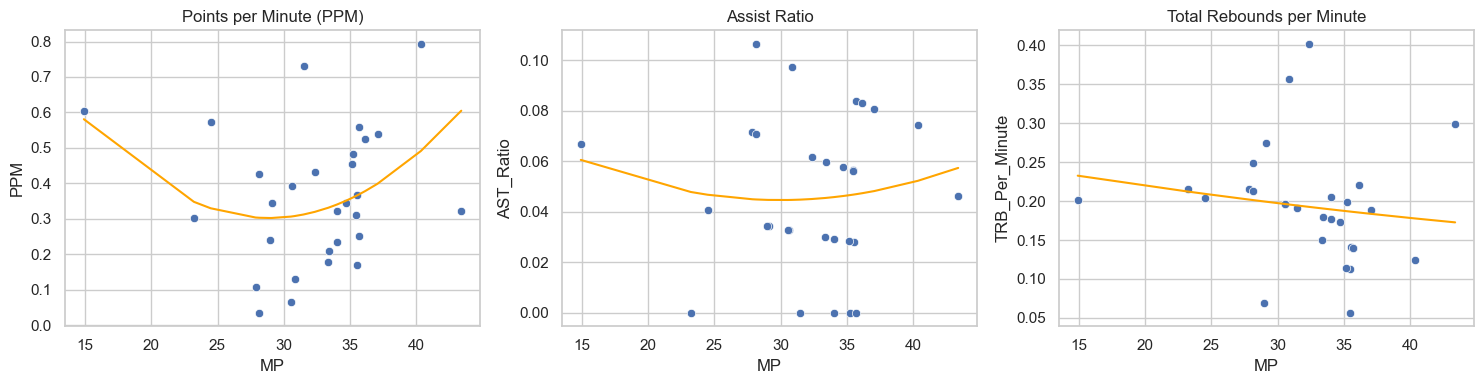

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and create a figure with subplots for each metric
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Points per Minute (PPM)
sns.scatterplot(x="MP", y="PPM", data=basic, ax=axes[0])
axes[0].set_title("Points per Minute (PPM)")
axes[0].plot(
    np.unique(basic["MP"]),
    np.poly1d(np.polyfit(basic["MP"], basic["PPM"], deg=2))(np.unique(basic["MP"])),
    color="orange",
)

# Assist Ratio
sns.scatterplot(x="MP", y="AST_Ratio", data=basic, ax=axes[1])
axes[1].set_title("Assist Ratio")
axes[1].plot(
    np.unique(basic["MP"]),
    np.poly1d(np.polyfit(basic["MP"], basic["AST_Ratio"], deg=2))(
        np.unique(basic["MP"])
    ),
    color="orange",
)

# Total Rebounds per Minute
sns.scatterplot(x="MP", y="TRB_Per_Minute", data=basic, ax=axes[2])
axes[2].set_title("Total Rebounds per Minute")
axes[2].plot(
    np.unique(basic["MP"]),
    np.poly1d(np.polyfit(basic["MP"], basic["TRB_Per_Minute"], deg=2))(
        np.unique(basic["MP"])
    ),
    color="orange",
)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()